In [1]:
# It is a classification algo
# Finding the best suited line to classify data
# Margin is the distance of nearby datapoints to the line
# Goal is to maximise this margin as it is then easier to distinguish the points
# These nearby datapoints are called Support Vectors
# For 2D: Line, For 3D: Plane, For nD: Hyperplane

In [2]:
# High gamma: considering only ver near points, less error but chances of overfitting, High Regularization
# Low gamma: considering far away points as well, might have little bit error, Low Regularization
# If data is not linearly separable, add one more dimension, then easy to linearly separate them
# This transformation is called Kernel

# Importing necessary libraries

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names # 0->setosa, 1->versicolor, 2-> virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df[df.target ==2].head()  # 1-50-> setosa, 51 - 100 -> versicolor, 101-150 -> virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])  # for each x in df.target, we get the target_name
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df0 = df[df.target == 0] # setosa
df1 = df[df.target == 1] # versiclor
df2 = df[df.target == 2] # virginica


# Visualizing the data

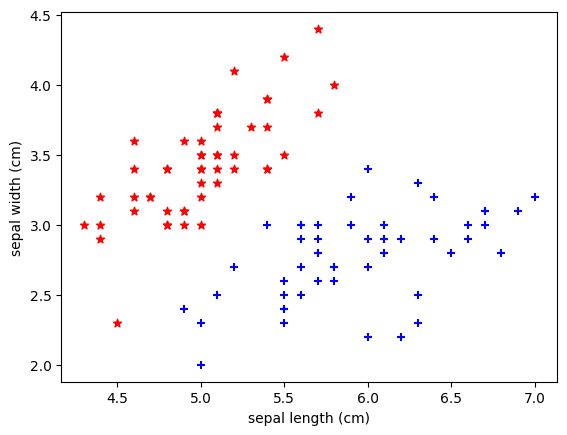

In [12]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'red', marker = '*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '+')
plt.show()

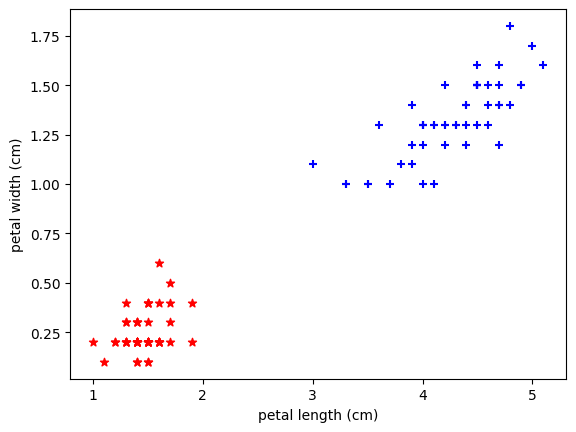

In [13]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'red', marker = '*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '+')
plt.show()

# Training using sklearn

In [14]:
X = df.drop(['target', 'flower_name'],axis = 1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
model = SVC(C = 10)

In [18]:
model.fit(X_train, y_train)

SVC(C=10)

In [19]:
model.score(X_test, y_test)

1.0